In [44]:
#ابوذر بختیاری برزیده
import scipy.io
import numpy as np
import pandas as pd
import scipy.io as sio
from scipy.signal import find_peaks
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split


In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade --no-cache-dir gdown
!gdown 15CfPVJJlfJajLqXYvIf1ObkqrLiWAp45
#https://drive.google.com/drive/folders/15CfPVJJlfJajLqXYvIf1ObkqrLiWAp45?usp=sharing


Mounted at /content/drive
  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
/usr/local/lib/python3.10/dist-packages/gdown/download.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs4.BeautifulSoup(line, features="html.parser")
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=15CfPVJJlfJajLqXYvIf1ObkqrLiWAp45

but Gdown can't. Please check connections and permissions.


In [52]:
# Load data from .mat files
df_test = pd.read_csv('/content/drive/MyDrive/machine-learning/mini project 1/2-1/test_data.csv')
df_train = pd.read_csv('/content/drive/MyDrive/machine-learning/mini project 1/2-1/train_data.csv')
df_test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Label
0,-1.025978,-1.029674,-1.049263,-1.027836,-1.327488,-1.029583,-0.502789,-1.417648,1.0
1,-1.020124,-1.017617,-1.010330,-1.012379,-1.076059,-1.010444,-1.612812,-1.061388,1.0
2,-0.960396,-0.953579,-0.964074,-0.945366,-0.970356,-0.936627,-0.826367,-0.961685,1.0
3,-0.927825,-0.923558,-0.885439,-0.936504,-0.456529,-0.944833,-3.110311,-0.398058,1.0
4,-1.047793,-1.044694,-0.989900,-1.052611,-0.753376,-1.058789,0.285232,-0.655097,1.0
...,...,...,...,...,...,...,...,...,...
105,1.140576,1.141065,1.036517,1.129965,0.798097,1.122252,0.953917,0.727520,2.0
106,1.051762,1.051911,1.031115,1.050452,0.911125,1.033772,1.368429,0.887659,2.0
107,0.979466,0.979250,1.035617,0.910155,1.154822,0.859842,1.373214,1.046811,2.0
108,1.022011,1.021796,0.944375,1.044927,0.760348,1.063828,1.013484,0.753995,2.0


In [53]:
df_test['Label'] = df_test['Label'].map({1: 0, 2: 1})
df_train['Label'] = df_train['Label'].map({1: 0, 2: 1})


In [54]:
df_test.columns =['data_std', 'data_rms', 'data_skewness', 'data_peak', 'data_crest_factor', 'data_absolute_mean','data_impact_factor','data_square_mean_root', 'label']
df_train.columns =['data_std', 'data_rms', 'data_skewness', 'data_peak', 'data_crest_factor', 'data_absolute_mean','data_impact_factor','data_square_mean_root', 'label']

In [55]:
df_train

,data_std,data_rms,data_skewness,data_peak,data_crest_factor,data_absolute_mean,data_impact_factor,data_square_mean_root,label
0,-1.050026,-1.044754,-0.965827,-1.053862,-0.537430,-1.060768,-0.961644,-0.359791,0
1,-0.989737,-0.993615,-0.941380,-0.982450,-0.665369,-0.964592,0.183660,-0.473746,0
2,-0.969763,-0.971200,-0.985542,-0.968835,-1.043903,-0.970309,-0.770726,-1.066610,0
3,-0.997048,-1.004113,-0.998160,-0.996011,-1.040172,-0.986062,-0.920402,-1.001041,0
4,-0.913342,-0.907035,-0.985542,-0.885209,-1.307125,-0.875153,-0.512410,-1.397108,0
...,...,...,...,...,...,...,...,...,...
435,1.011497,1.011438,0.942093,1.065198,0.713036,1.059742,1.058497,0.743887,1
436,1.099204,1.099534,0.887136,1.088011,0.577038,1.055123,1.123040,0.452034,1
437,1.290007,1.291159,0.854284,1.275573,0.260996,1.237382,0.773212,0.057587,1
438,1.044969,1.044870,1.227009,0.964570,1.423039,0.916024,1.370652,1.318112,1


In [56]:
# محاسبه ماتریس همبستگی
correlation_matrix = df_train.corr()
# تعیین سطح همبستگی برای حذف ویژگی‌ها
threshold = 0.80
# پیدا کردن اندیس ستون‌هایی که باید حذف شوند
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

# حذف ویژگی‌های دارای همبستگی بالا
df_reduced = df_train.drop(columns=columns_to_drop)

# نمایش ویژگی‌های حذف شده و باقی‌مانده
print(f"Removed columns with high correlation: {columns_to_drop}")
print(f"Remaining features: {df_reduced.columns}")


Removed columns with high correlation: {'data_rms', 'data_square_mean_root', 'data_skewness', 'data_peak', 'data_crest_factor', 'data_absolute_mean', 'label'}
Remaining features: Index(['data_std', 'data_impact_factor'], dtype='object')


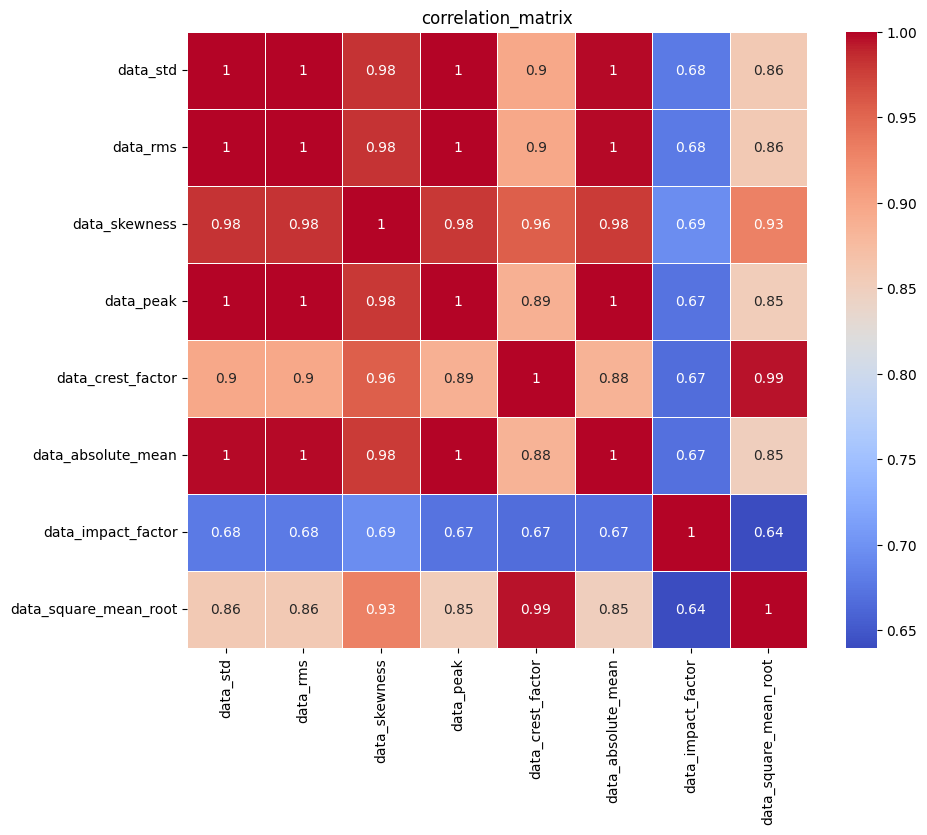

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


columns =['data_std', 'data_rms', 'data_skewness', 'data_peak', 'data_crest_factor', 'data_absolute_mean','data_impact_factor','data_square_mean_root']

correlation_matrix = df_train[columns].corr()

# نمایش نمودار همبستگی
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('correlation_matrix')
plt.show()

In [59]:
x_train = df_train[['data_std', 'data_skewness']].values
y_train = df_train[['label']].values
x_test= df_test[['data_std', 'data_skewness']].values
y_test=df_test[['label']].values
# ترکیب داده‌های آموزش و تست
X_combined = np.vstack((x_train, x_test))
y_combined = np.vstack((y_train, y_test))
print(f'all number data :{X_combined.shape}')


all number data :(550, 2)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=4,stratify=y_combined,shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(440, 2)
(440, 1)
(110, 2)
(110, 1)


In [61]:
labels,counts=np.unique(y_train,return_counts=True)
print(counts/float(len(y_combined)))
labels,counts=np.unique(y_test,return_counts=True)
print(counts/float(len(y_combined)))


[0.4 0.4]
[0.1 0.1]


In [62]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

In [63]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

In [64]:
X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
X_train.shape

(440, 3)

In [66]:
m = 2
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.01
n_epochs = 5000

(3, 1)


In [67]:
error_hist = []
y_pred2=[]
for epoch in range(n_epochs):
    # predictions
    y_hat= logistic_regression(X_train,w)
    y_pred2.append(y_hat)
    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(X_train, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) % 1 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Epoch=0, 	 E=1.609,	 w=[-1.68745131e+00 -1.03536818e+00 -1.40563206e-04]
Epoch=1, 	 E=1.6,	 w=[-1.68447029 -1.02900368  0.00619134]
Epoch=2, 	 E=1.591,	 w=[-1.68148308 -1.02265435  0.01250813]
Epoch=3, 	 E=1.582,	 w=[-1.67848983 -1.01632016  0.01880981]
Epoch=4, 	 E=1.573,	 w=[-1.67549065 -1.0100011   0.0250964 ]
Epoch=5, 	 E=1.564,	 w=[-1.67248569 -1.00369715  0.0313679 ]
Epoch=6, 	 E=1.555,	 w=[-1.66947506 -0.99740831  0.03762433]
Epoch=7, 	 E=1.546,	 w=[-1.6664589  -0.99113455  0.04386569]
Epoch=8, 	 E=1.538,	 w=[-1.66343734 -0.98487587  0.050092  ]
Epoch=9, 	 E=1.529,	 w=[-1.6604105  -0.97863225  0.05630326]
Epoch=10, 	 E=1.52,	 w=[-1.65737852 -0.97240368  0.06249949]
Epoch=11, 	 E=1.512,	 w=[-1.65434153 -0.96619015  0.06868067]
Epoch=12, 	 E=1.503,	 w=[-1.65129965 -0.95999165  0.07484683]
Epoch=13, 	 E=1.495,	 w=[-1.64825302 -0.95380817  0.08099797]
Epoch=14, 	 E=1.486,	 w=[-1.64520177 -0.9476397   0.08713409]
Epoch=15, 	 E=1.478,	 w=[-1.64214603 -0.94148623  0.09325519]
Epoch=16,

In [68]:
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))
X_test.shape

(110, 3)

In [69]:
y_hat = logistic_regression(X_test, w)

print('Calculate accuracy\n')
accuracy_score = accuracy(y_test, y_hat)
print(f'Accuracy: {accuracy_score}\n')


Calculate accuracy

Accuracy: 1.0



In [71]:
from sklearn.metrics import confusion_matrix

y_pred_binary = np.round(y_hat)
#محاسبه  با شاخص دوم _ماتریس درهمریختگی
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[55  0]
 [ 0 55]]


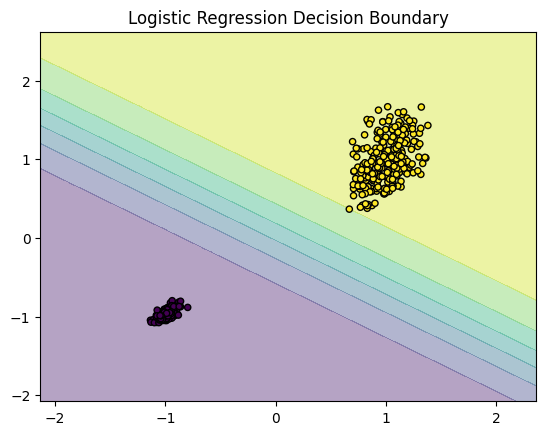

In [72]:
w0, w1, w2 = w.T[0][0],w.T[0][1],w.T[0][2]
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = sigmoid(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()] @ [w0, w1, w2])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, s=20, edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.show()


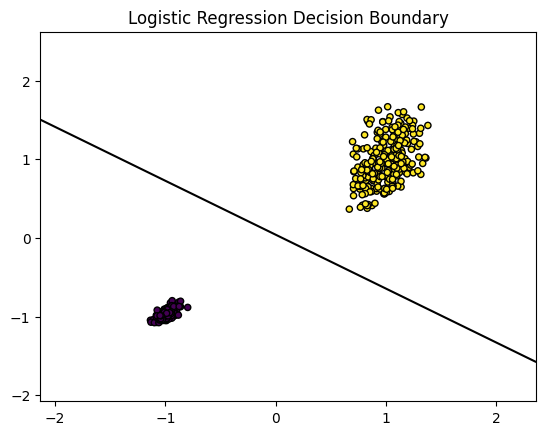

In [73]:
w0, w1, w2 = w.T[0][0],w.T[0][1],w.T[0][2]
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = sigmoid(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()] @ [w0, w1, w2])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='k')
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, s=20, edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.show()


#2_b

In [12]:
data_std = np.std(X, axis=1, keepdims=True)
data_rms = np.sqrt(np.mean(np.square(X), axis=1)).reshape(-1, 1)
data_peak=np.max(np.abs(X), axis=1).reshape(-1, 1)
data_abs_mean=np.mean(np.abs(X), axis=1).reshape(-1, 1)
data_impact_factor = np.max(np.abs(X), axis=1).reshape(-1, 1) / np.mean(np.abs(X), axis=1).reshape(-1, 1)
data_smr= np.square(np.mean(np.sqrt(np.abs(X)), axis=1)).reshape(-1, 1)
data_skewness= np.mean(((X - np.mean(X, axis=1, keepdims=True)) ** 3) / (np.std(X, axis=1, keepdims=True) ** 3), axis=1).reshape(-1, 1)
data_cf=np.max(np.abs(X), axis=1).reshape(-1, 1) / np.sqrt(np.mean(np.square(X), axis=1)).reshape(-1, 1)


X_new = np.hstack([data_std, data_rms,data_peak,data_abs_mean,data_impact_factor,data_smr,data_skewness,data_cf])
X_new.shape

(550, 8)

In [14]:
# Function to split the data
def data_split(X, per):
    limit = int(len(X) * per)
    idx = np.random.permutation(len(X))
    return idx[:limit], idx[limit:]

# Splitting the data
d_train = 0.8
i_train1, i_test1 = data_split(X_new[:N], d_train)
i_train2, i_test2 = data_split(X_new[N:], d_train)
i_test1

array([204, 241, 237, 100, 173, 202, 198, 158,  23, 190, 211,   7, 221,
       201, 251, 266,  69,   8, 217, 126, 168, 104,  92, 197,  11, 263,
       210,  83, 213,  15,  26, 188, 231, 257, 271, 119,   0,  51, 128,
       162,  89, 116, 178, 108,  81, 154, 156, 142, 160, 151,  70, 258,
       106, 206, 192])

In [15]:
C1_train, C1_test = X_new[:N][i_train1], X_new[:N][i_test1]
C2_train, C2_test = X_new[N:][i_train2], X_new[N:][i_test2]

X_train = np.vstack((C1_train, C2_train))
y_train = np.vstack((np.ones((len(C1_train), 1)), 2 * np.ones((len(C2_train), 1))))
X_test = np.vstack((C1_test, C2_test))
y_test = np.vstack((np.ones((len(C1_test), 1)), 2 * np.ones((len(C2_test), 1))))

print('data_1 X_train: ', X_train.shape)
print('data 1 y_train: ', y_train.shape)
print('data_2 X_test: ', X_test.shape)
print('data_2 y_test: ', y_test.shape)

data_1 X_train:  (440, 8)
data 1 y_train:  (440, 1)
data_2 X_test:  (110, 8)
data_2 y_test:  (110, 1)


In [16]:
# Preprocessing (normalization)
def Preprocessing(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma


X_train = Preprocessing(X_train)
X_test = Preprocessing(X_test)

print(X_train.shape)
print(X_test.shape)


(440, 8)
(110, 8)


In [25]:
train_df = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=[f'Feature {i+1}' for i in range(X_train.shape[1])] + ['Label'])
test_df = pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=[f'Feature {i+1}' for i in range(X_test.shape[1])] + ['Label'])

train_df.to_csv('/content/drive/MyDrive/machine-learning/mini project 1/2-1/train_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/machine-learning/mini project 1/2-1/test_data.csv', index=False)


In [26]:
print(test_df.shape)
print(test_df.columns)

(110, 9)
Index(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
       'Feature 6', 'Feature 7', 'Feature 8', 'Label'],
      dtype='object')


In [29]:
df_test = pd.read_csv('/content/drive/MyDrive/machine-learning/mini project 1/2-1/test_data.csv')
df_train = pd.read_csv('/content/drive/MyDrive/machine-learning/mini project 1/2-1/train_data.csv')

In [32]:
df_test, df_train

(     data_std  data_rms  data_skewness  data_peak  data_crest_factor  \
 0   -1.025978 -1.029674      -1.049263  -1.027836          -1.327488   
 1   -1.020124 -1.017617      -1.010330  -1.012379          -1.076059   
 2   -0.960396 -0.953579      -0.964074  -0.945366          -0.970356   
 3   -0.927825 -0.923558      -0.885439  -0.936504          -0.456529   
 4   -1.047793 -1.044694      -0.989900  -1.052611          -0.753376   
 ..        ...       ...            ...        ...                ...   
 105  1.140576  1.141065       1.036517   1.129965           0.798097   
 106  1.051762  1.051911       1.031115   1.050452           0.911125   
 107  0.979466  0.979250       1.035617   0.910155           1.154822   
 108  1.022011  1.021796       0.944375   1.044927           0.760348   
 109  1.013423  1.013794       0.833623   1.092389           0.488514   
 
      data_absolute_mean  data_impact_factor  data_square_mean_root  label  
 0             -1.029583           -0.502789 

In [33]:
df_test.columns = ['data_std', 'data_rms', 'data_skewness', 'data_peak', 'data_crest_factor', 'data_absolute_mean','data_impact_factor','data_square_mean_root', 'label']
df_train.columns = ['data_std', 'data_rms', 'data_skewness', 'data_peak', 'data_crest_factor', 'data_absolute_mean','data_impact_factor','data_square_mean_root', 'label']

df_test, df_train

(     data_std  data_rms  data_skewness  data_peak  data_crest_factor  \
 0   -1.025978 -1.029674      -1.049263  -1.027836          -1.327488   
 1   -1.020124 -1.017617      -1.010330  -1.012379          -1.076059   
 2   -0.960396 -0.953579      -0.964074  -0.945366          -0.970356   
 3   -0.927825 -0.923558      -0.885439  -0.936504          -0.456529   
 4   -1.047793 -1.044694      -0.989900  -1.052611          -0.753376   
 ..        ...       ...            ...        ...                ...   
 105  1.140576  1.141065       1.036517   1.129965           0.798097   
 106  1.051762  1.051911       1.031115   1.050452           0.911125   
 107  0.979466  0.979250       1.035617   0.910155           1.154822   
 108  1.022011  1.021796       0.944375   1.044927           0.760348   
 109  1.013423  1.013794       0.833623   1.092389           0.488514   
 
      data_absolute_mean  data_impact_factor  data_square_mean_root  label  
 0             -1.029583           -0.502789 

#**2-3**

In [34]:
x_train = df_train[['data_std', 'data_rms', 'data_skewness', 'data_peak', 'data_crest_factor', 'data_absolute_mean','data_impact_factor','data_square_mean_root']].values
y_train = df_train[['label']].values
x_test= df_test[['data_std', 'data_rms', 'data_skewness', 'data_peak', 'data_crest_factor', 'data_absolute_mean','data_impact_factor','data_square_mean_root']].values
y_test=df_test[['label']].values
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(440, 8)
(440, 1)
(110, 8)
(110, 1)


In [37]:
# ترکیب داده‌های آموزش و تست
X_combined = np.vstack((x_train, x_test))
y_combined = np.vstack((y_train, y_test))

print(f'all number data :{X_combined.shape}')

X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=4,shuffle=True)

print(X_train_combined.shape)
print(y_train_combined.shape)
print(X_test_combined.shape)
print(y_test_combined.shape)


all number data :(550, 8)
(440, 8)
(440, 1)
(110, 8)
(110, 1)


#2-4

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_combined)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test_combined)
X_train_scaled

array([[0.9268281 , 0.92647269, 0.74770877, ..., 0.94549034, 0.64898733,
        0.49724141],
       [0.03752549, 0.04275431, 0.02545544, ..., 0.05611712, 0.27864763,
        0.15297233],
       [0.07199871, 0.07542169, 0.09189845, ..., 0.09667823, 0.        ,
        0.46477921],
       ...,
       [0.81736991, 0.81656711, 0.85319405, ..., 0.75613784, 0.8812877 ,
        0.79632544],
       [0.04160791, 0.04151545, 0.02847558, ..., 0.05024047, 0.41925232,
        0.18045261],
       [0.05895031, 0.05587228, 0.05306812, ..., 0.07169172, 0.7087954 ,
        0.29564864]])

In [41]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
Standard_scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_Standardscaler = Standard_scaler.fit_transform(X_train_combined)

# Use the same scaler to transform the test data
X_test_Standardscaler = Standard_scaler.transform(X_test_combined)
X_train_Standardscaler

array([[ 1.20373693,  1.20460243,  0.97414882, ...,  1.30846264,
         0.4321888 ,  0.45811652],
       [-1.03718626, -1.0230429 , -1.00225776, ..., -1.02447505,
        -1.77559198, -0.93790875],
       [-0.95031837, -0.94069613, -0.8204401 , ..., -0.91807816,
        -3.43675035,  0.32648097],
       ...,
       [ 0.92791699,  0.92755641,  1.2628035 , ...,  0.81176724,
         1.81704782,  1.67091456],
       [-1.02689911, -1.02616577, -0.99399332, ..., -1.03989023,
        -0.9373769 , -0.82647509],
       [-0.98319859, -0.98997559, -0.92669718, ..., -0.98362091,
         0.78873468, -0.35935047]])

In [43]:
print(df_train.max())
print()
print(df_train.min())

data_std                 1.381354
data_rms                 1.383110
data_skewness            1.668815
data_peak                1.474924
data_crest_factor        2.436574
data_absolute_mean       1.539886
data_impact_factor       2.543017
data_square_mean_root    2.522856
label                    2.000000
dtype: float64

data_std                -1.135715
data_rms                -1.134556
data_skewness           -1.076628
data_peak               -1.159320
data_crest_factor       -1.491256
data_absolute_mean      -1.174171
data_impact_factor      -3.468511
data_square_mean_root   -1.577290
label                    1.000000
dtype: float64
